### 1.1 Install Dependencies

In [1]:
%pip install tensorflow opencv-python pandas numpy matplotlib seaborn scikit-learn
%pip install mtcnn face-recognition pillow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Setup plotting
plt.style.use('default')
%matplotlib inline

# Create directories
import os
os.makedirs('results', exist_ok=True)
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)

print("✅ Setup complete!")
print("📁 Created directories: results/, data/, models/")
print("📦 Installed all required packages")
print("\n🎯 Next: Upload your Excel file to data/ folder")

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 80.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-20.0.0-cp39-cp39-linux_x86_64.whl size=4539533 sha256=474c03ee70533012109a94bcde08baf9f95ad80c0854d1a3fa2378ae7f5edc08
  Stored in directory: /mnt/extended-home/dheazalfarani/.cache/pip/wheels/9f/6d/f3/ddcc2898826bfd5df18be74032671c674c0ef0e896fc2af080
  DEPRECATION: Building 'face-recognition-models' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (pos

### 1.2 Load & Explore Data

In [3]:
print("📊 LOADING DATA...")

# Load your Excel file
excel_path = "data/emotion_data.xlsx"  # SESUAIKAN NAMA FILE ANDA
df = pd.read_excel(excel_path)

print(f"✅ Data loaded successfully!")
print(f"📏 Shape: {df.shape}")
print(f"👥 Unique users: {df['user_id'].nunique()}")

# Display first few rows
print("\n📋 First 5 rows:")
display(df.head())

# Check columns
print(f"\n📊 Columns: {list(df.columns)}")

# Check for missing values
print(f"\n❓ Missing values:")
print(df.isnull().sum())

# Basic stats for emotion columns
emotion_cols = ['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgusted', 'surprised']
print(f"\n😊 Emotion columns found: {[col for col in emotion_cols if col in df.columns]}")

# Quick preview of emotion distributions
if all(col in df.columns for col in emotion_cols):
    print("\n📈 Emotion Statistics:")
    display(df[emotion_cols].describe())
else:
    print("❌ Some emotion columns are missing!")
    print(f"Available columns: {df.columns.tolist()}")

📊 LOADING DATA...
✅ Data loaded successfully!
📏 Shape: (4443, 11)
👥 Unique users: 20

📋 First 5 rows:


,id,user_id,timestamp,neutral,happy,sad,angry,fearful,disgusted,surprised,page
0,109,97,2025-04-22 11:54:44,0.995978,4.015938e-03,4.444548e-06,4.884762e-08,6.682117e-09,2.295871e-09,1.592178e-06,/tantangan/penjumlahan-dua-angka
1,110,97,2025-04-22 11:54:49,0.999993,6.609308e-06,5.453139e-08,1.490877e-09,2.900000e-15,1.678441e-10,2.616899e-08,/tantangan/penjumlahan-dua-angka
2,111,97,2025-04-22 11:54:54,0.991372,2.716015e-08,7.195449e-03,1.393107e-03,1.848178e-10,2.432731e-07,3.956773e-05,/tantangan/penjumlahan-dua-angka
3,112,97,2025-04-22 11:54:59,0.982950,4.474408e-09,1.596517e-02,1.065390e-03,4.859080e-11,5.886058e-08,1.942848e-05,/tantangan/penjumlahan-dua-angka
4,113,97,2025-04-22 11:55:04,0.999697,3.031007e-04,6.709266e-09,6.419338e-09,8.680000e-14,3.954940e-11,4.234746e-08,/tantangan/penjumlahan-dua-angka



📊 Columns: ['id', 'user_id', 'timestamp', 'neutral', 'happy', 'sad', 'angry', 'fearful', 'disgusted', 'surprised', 'page']

❓ Missing values:
id           0
user_id      0
timestamp    0
neutral      0
happy        0
sad          0
angry        0
fearful      0
disgusted    0
surprised    0
page         0
dtype: int64

😊 Emotion columns found: ['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgusted', 'surprised']

📈 Emotion Statistics:


,neutral,happy,sad,angry,fearful,disgusted,surprised
count,4.443000e+03,4.443000e+03,4.443000e+03,4.443000e+03,4.443000e+03,4.443000e+03,4.443000e+03
mean,7.745162e-01,1.281680e-01,6.351788e-02,1.517346e-02,6.886570e-04,5.276804e-03,1.267100e-02
std,3.668786e-01,3.094281e-01,2.037816e-01,7.872878e-02,1.629601e-02,5.127846e-02,7.404527e-02
min,1.845000e-13,7.517000e-13,3.600000e-15,9.200000e-15,1.000000e-15,2.400000e-15,1.200000e-15
25%,7.124973e-01,2.398786e-06,4.173620e-06,3.636184e-06,3.812071e-10,3.417714e-08,3.313176e-06
50%,9.907168e-01,1.113336e-04,1.463597e-04,7.086380e-05,3.313029e-08,1.582752e-06,6.714115e-05
75%,9.995583e-01,7.160018e-03,4.805181e-03,1.427558e-03,1.483561e-06,7.043146e-05,1.046826e-03
max,1.000000e+00,1.000000e+00,9.999868e-01,9.823511e-01,9.885558e-01,9.836864e-01,9.950719e-01


### 1.3 Engagement Analysis

In [6]:
print("🧮 CALCULATING ENGAGEMENT SCORES...")

# Bobot dari paper (disesuaikan dengan Face API)
emotion_weights = {
    'angry': -0.10,
    'disgusted': -0.05,
    'fearful': -0.20,
    'sad': -0.05,
    'happy': 0.10,
    'surprised': 0.15,
    'neutral': 0.30
}

# Function untuk hitung engagement score
def calculate_engagement_score(row):
    score = 0
    for emotion, weight in emotion_weights.items():
        if emotion in row:
            score += weight * row[emotion]
    return score

# Apply engagement calculation
df['engagement_score'] = df.apply(calculate_engagement_score, axis=1)

# Classify engagement level berdasarkan threshold paper
def classify_engagement(score):
    if score > 0.14:
        return "Highly Engaged"
    elif 0.10 <= score <= 0.14:
        return "Engaged"
    else:
        return "Disengaged"

df['engagement_level'] = df['engagement_score'].apply(classify_engagement)

print("✅ Engagement scores calculated!")
print(f"📊 Score range: {df['engagement_score'].min():.3f} to {df['engagement_score'].max():.3f}")

# Show distribution
engagement_dist = df['engagement_level'].value_counts()
print(f"\n🎯 Engagement Level Distribution:")
for level, count in engagement_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   {level}: {count} ({percentage:.1f}%)")

# Preview results
print(f"\n📋 Sample Results:")
display(df[['user_id', 'timestamp', 'engagement_score', 'engagement_level', 'page']].head(10))

🧮 CALCULATING ENGAGEMENT SCORES...
✅ Engagement scores calculated!
📊 Score range: -0.197 to 0.300

🎯 Engagement Level Distribution:
   Highly Engaged: 3585 (80.7%)
   Disengaged: 500 (11.3%)
   Engaged: 358 (8.1%)

📋 Sample Results:


,user_id,timestamp,engagement_score,engagement_level,page
0,97,2025-04-22 11:54:44,0.299195,Highly Engaged,/tantangan/penjumlahan-dua-angka
1,97,2025-04-22 11:54:49,0.299999,Highly Engaged,/tantangan/penjumlahan-dua-angka
2,97,2025-04-22 11:54:54,0.296918,Highly Engaged,/tantangan/penjumlahan-dua-angka
3,97,2025-04-22 11:54:59,0.293983,Highly Engaged,/tantangan/penjumlahan-dua-angka
4,97,2025-04-22 11:55:04,0.299939,Highly Engaged,/tantangan/penjumlahan-dua-angka
5,97,2025-04-22 11:55:14,0.299990,Highly Engaged,/tantangan/penjumlahan-dua-angka
6,97,2025-04-22 11:55:19,0.299983,Highly Engaged,/tantangan/penjumlahan-dua-angka
7,97,2025-04-22 11:55:24,0.100000,Disengaged,/tantangan/penjumlahan-dua-angka
8,97,2025-04-22 11:55:29,0.100003,Engaged,/tantangan/penjumlahan-dua-angka
9,97,2025-04-22 11:55:34,0.100282,Engaged,/tantangan/penjumlahan-dua-angka


### 1.4 Visualizations

🎨 CREATING VISUALIZATIONS...


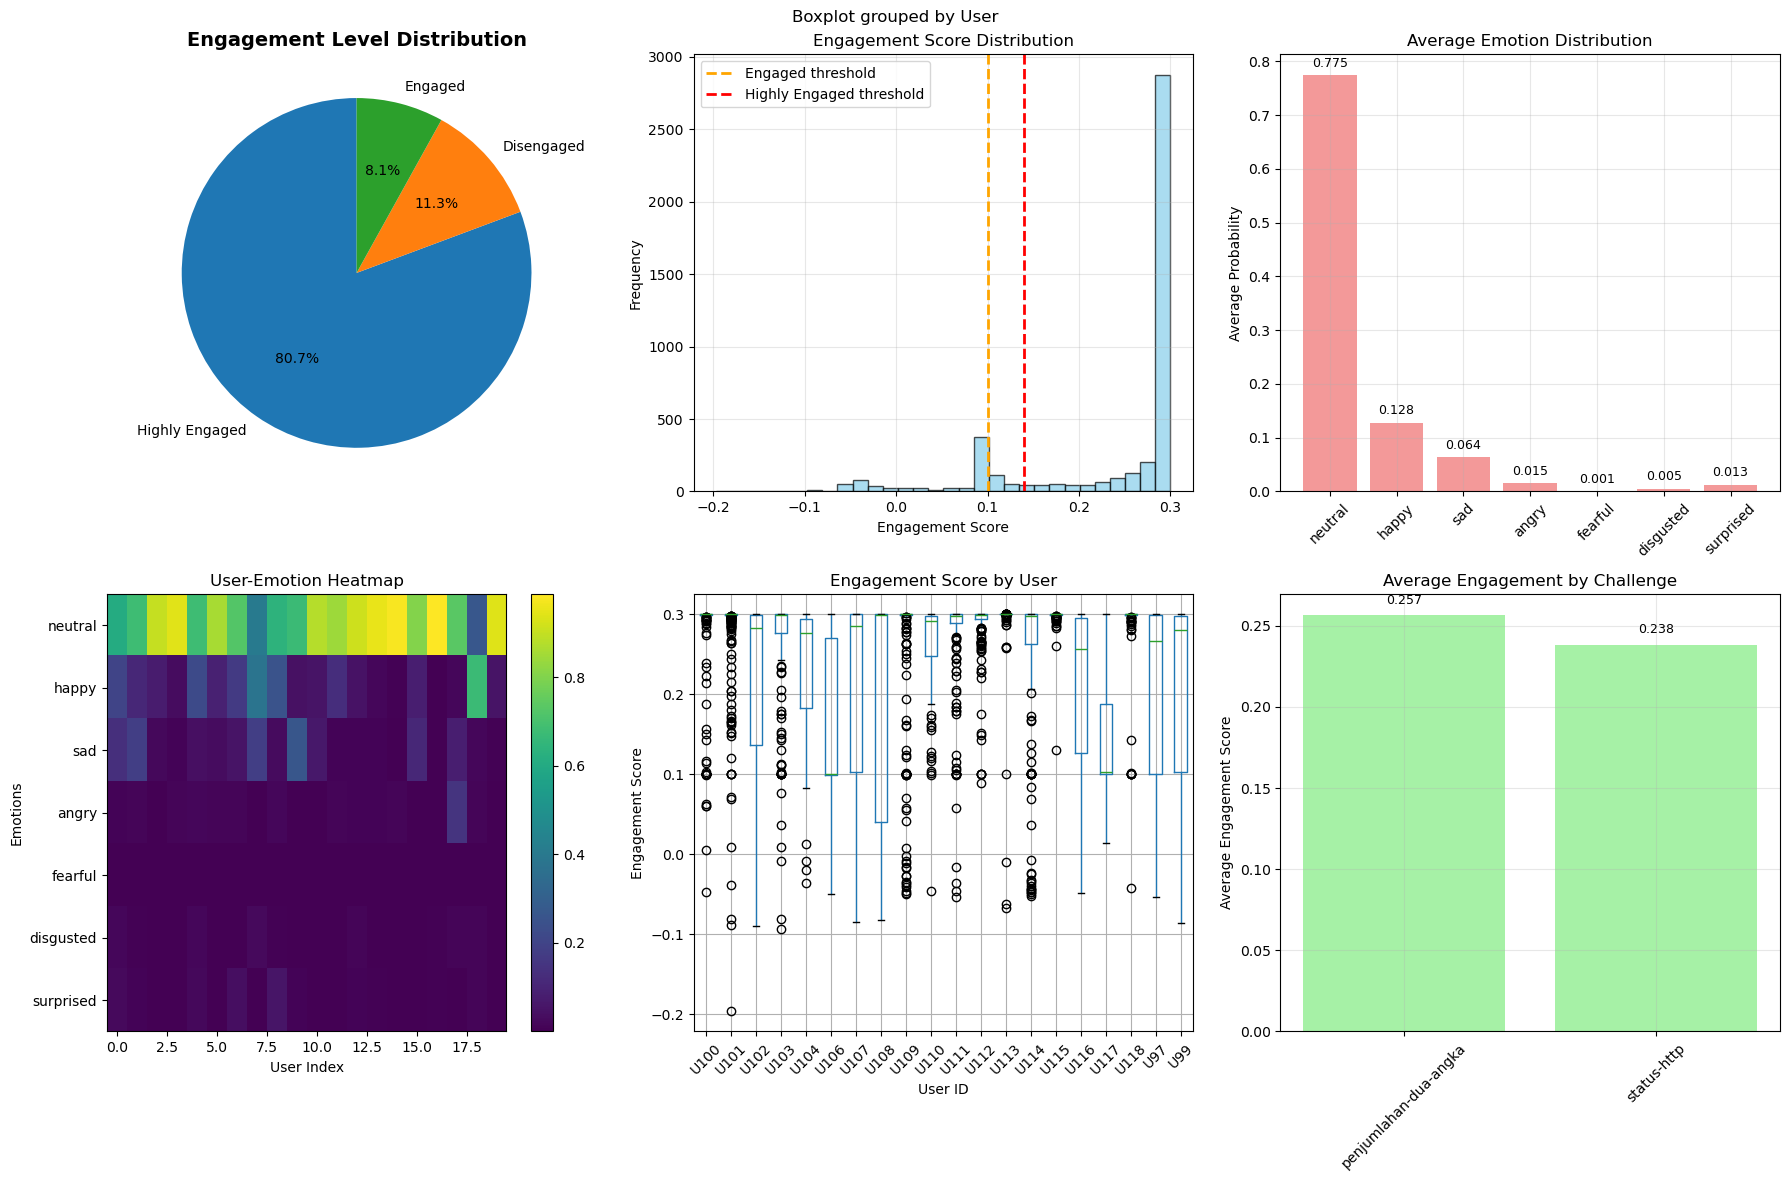

✅ Visualizations complete!
💾 Saved to: results/engagement_analysis.png


In [10]:
print("🎨 CREATING VISUALIZATIONS...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Engagement Level Pie Chart
engagement_counts = df['engagement_level'].value_counts()
axes[0,0].pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Engagement Level Distribution', fontsize=14, fontweight='bold')

# 2. Engagement Score Histogram
axes[0,1].hist(df['engagement_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].axvline(x=0.10, color='orange', linestyle='--', linewidth=2, label='Engaged threshold')
axes[0,1].axvline(x=0.14, color='red', linestyle='--', linewidth=2, label='Highly Engaged threshold')
axes[0,1].set_xlabel('Engagement Score')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Engagement Score Distribution')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Average Emotions Bar Chart
emotion_means = df[emotion_cols].mean()
bars = axes[0,2].bar(emotion_means.index, emotion_means.values, color='lightcoral', alpha=0.8)
axes[0,2].set_xticklabels(emotion_means.index, rotation=45)
axes[0,2].set_title('Average Emotion Distribution')
axes[0,2].set_ylabel('Average Probability')
axes[0,2].grid(True, alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 4. User Engagement Heatmap
user_emotion_avg = df.groupby('user_id')[emotion_cols].mean()
im = axes[1,0].imshow(user_emotion_avg.T.values, cmap='viridis', aspect='auto')
axes[1,0].set_title('User-Emotion Heatmap')
axes[1,0].set_xlabel('User Index')
axes[1,0].set_ylabel('Emotions')
axes[1,0].set_yticks(range(len(emotion_cols)))
axes[1,0].set_yticklabels(emotion_cols)
plt.colorbar(im, ax=axes[1,0])

# 5. Per User Engagement Box Plot
user_engagement_scores = []
user_ids = []
for user_id in df['user_id'].unique():
    user_data = df[df['user_id'] == user_id]
    user_engagement_scores.extend(user_data['engagement_score'].tolist())
    user_ids.extend([f"U{user_id}"] * len(user_data))

# Create DataFrame for box plot
box_data = pd.DataFrame({'User': user_ids, 'Engagement': user_engagement_scores})
box_data.boxplot(column='Engagement', by='User', ax=axes[1,1])
axes[1,1].set_title('Engagement Score by User')
axes[1,1].set_xlabel('User ID')
axes[1,1].set_ylabel('Engagement Score')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Challenge/Page Comparison
if 'page' in df.columns and df['page'].notna().sum() > 0:
    page_engagement = df.groupby('page')['engagement_score'].mean().sort_values(ascending=False)
    bars = axes[1,2].bar(range(len(page_engagement)), page_engagement.values, color='lightgreen', alpha=0.8)
    axes[1,2].set_xticks(range(len(page_engagement)))
    axes[1,2].set_xticklabels([p.split('/')[-1] if '/' in str(p) else str(p) for p in page_engagement.index], rotation=45)
    axes[1,2].set_title('Average Engagement by Challenge')
    axes[1,2].set_ylabel('Average Engagement Score')
    axes[1,2].grid(True, alpha=0.3)
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[1,2].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9)
else:
    axes[1,2].text(0.5, 0.5, 'No page data available', ha='center', va='center', fontsize=12)
    axes[1,2].set_title('Challenge Analysis (N/A)')

plt.tight_layout()
plt.savefig('results/engagement_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualizations complete!")
print("💾 Saved to: results/engagement_analysis.png")

### 1.5 Summary Statistics

In [12]:
print("📋 GENERATING SUMMARY REPORT...")
print("=" * 60)

# Basic Statistics
total_records = len(df)
unique_users = df['user_id'].nunique()
unique_pages = df['page'].nunique() if 'page' in df.columns else 0

print(f"📊 DATASET OVERVIEW:")
print(f"   📏 Total Records: {total_records:,}")
print(f"   👥 Unique Users: {unique_users}")
print(f"   📚 Unique Pages/Challenges: {unique_pages}")
print(f"   📈 Records per User: {total_records/unique_users:.1f}")

# Engagement Statistics
engagement_stats = df['engagement_score'].describe()
print(f"\n🎯 ENGAGEMENT SCORE STATISTICS:")
print(f"   📊 Mean: {engagement_stats['mean']:.4f}")
print(f"   📊 Std Dev: {engagement_stats['std']:.4f}")
print(f"   📊 Min: {engagement_stats['min']:.4f}")
print(f"   📊 Max: {engagement_stats['max']:.4f}")
print(f"   📊 Median: {engagement_stats['50%']:.4f}")

# Engagement Level Distribution
level_dist = df['engagement_level'].value_counts(normalize=True) * 100
print(f"\n🏆 ENGAGEMENT LEVEL DISTRIBUTION:")
for level, pct in level_dist.items():
    print(f"   {level}: {pct:.1f}%")

# Top Emotions
top_emotions = df[emotion_cols].mean().sort_values(ascending=False)
print(f"\n😊 TOP EMOTIONS (Average Probability):")
for i, (emotion, value) in enumerate(top_emotions.items()):
    print(f"   {i+1}. {emotion}: {value:.4f}")

# Per User Summary
print(f"\n👥 PER USER ENGAGEMENT SUMMARY:")
user_summary = df.groupby('user_id').agg({
    'engagement_score': ['mean', 'std', 'min', 'max'],
    'engagement_level': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown'
}).round(4)

user_summary.columns = ['Avg_Score', 'Std_Score', 'Min_Score', 'Max_Score', 'Dominant_Level']
display(user_summary.head(10))

# Per Challenge Summary (if available)
if 'page' in df.columns and df['page'].notna().sum() > 0:
    print(f"\n📚 PER CHALLENGE ENGAGEMENT:")
    challenge_summary = df.groupby('page').agg({
        'engagement_score': ['mean', 'std', 'count'],
        'engagement_level': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown'
    }).round(4)
    challenge_summary.columns = ['Avg_Score', 'Std_Score', 'Record_Count', 'Dominant_Level']
    display(challenge_summary)

# Correlation Analysis
print(f"\n🔗 EMOTION CORRELATIONS:")
correlation_matrix = df[emotion_cols].corr()
display(correlation_matrix.round(3))

# Export Results
print(f"\n💾 EXPORTING RESULTS...")

# Save processed data
df.to_csv('results/processed_engagement_data.csv', index=False)
print(f"   ✅ Processed data: results/processed_engagement_data.csv")

# Save summary statistics
summary_stats = {
    'total_records': total_records,
    'unique_users': unique_users,
    'engagement_stats': engagement_stats.to_dict(),
    'level_distribution': level_dist.to_dict(),
    'top_emotions': top_emotions.to_dict(),
    'user_summary': user_summary.to_dict(),
}

import json
with open('results/summary_stats.json', 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)
print(f"   ✅ Summary stats: results/summary_stats.json")

# Save user summary
user_summary.to_csv('results/user_engagement_summary.csv')
print(f"   ✅ User summary: results/user_engagement_summary.csv")

if 'page' in df.columns and df['page'].notna().sum() > 0:
    challenge_summary.to_csv('results/challenge_engagement_summary.csv')
    print(f"   ✅ Challenge summary: results/challenge_engagement_summary.csv")

print(f"\n🎉 BASELINE ANALYSIS COMPLETE!")
print(f"📁 All results saved to 'results/' folder")
print(f"\n🚀 Ready for next step: CNN Training with FER2013!")

# Show final dataframe preview
print(f"\n📋 FINAL PROCESSED DATA PREVIEW:")
display(df.head())

📋 GENERATING SUMMARY REPORT...
📊 DATASET OVERVIEW:
   📏 Total Records: 4,443
   👥 Unique Users: 20
   📚 Unique Pages/Challenges: 2
   📈 Records per User: 222.2

🎯 ENGAGEMENT SCORE STATISTICS:
   📊 Mean: 0.2420
   📊 Std Dev: 0.0966
   📊 Min: -0.1966
   📊 Max: 0.3000
   📊 Median: 0.2974

🏆 ENGAGEMENT LEVEL DISTRIBUTION:
   Highly Engaged: 80.7%
   Disengaged: 11.3%
   Engaged: 8.1%

😊 TOP EMOTIONS (Average Probability):
   1. neutral: 0.7745
   2. happy: 0.1282
   3. sad: 0.0635
   4. angry: 0.0152
   5. surprised: 0.0127
   6. disgusted: 0.0053
   7. fearful: 0.0007

👥 PER USER ENGAGEMENT SUMMARY:


,Avg_Score,Std_Score,Min_Score,Max_Score,Dominant_Level
user_id,,,,,
97,0.1976,0.1146,-0.0534,0.3,Highly Engaged
99,0.2056,0.1209,-0.0865,0.3,Highly Engaged
100,0.2770,0.0638,-0.0478,0.3,Highly Engaged
101,0.2840,0.0567,-0.1966,0.3,Highly Engaged
102,0.2253,0.0949,-0.0898,0.3,Highly Engaged
103,0.2641,0.0747,-0.0930,0.3,Highly Engaged
104,0.2344,0.0786,-0.0357,0.3,Highly Engaged
106,0.1500,0.1066,-0.0494,0.3,Disengaged
107,0.2221,0.0964,-0.0852,0.3,Highly Engaged



📚 PER CHALLENGE ENGAGEMENT:


,Avg_Score,Std_Score,Record_Count,Dominant_Level
page,,,,
/tantangan/penjumlahan-dua-angka,0.2567,0.0801,855,Highly Engaged
/tantangan/status-http,0.2385,0.0998,3588,Highly Engaged



🔗 EMOTION CORRELATIONS:


,neutral,happy,sad,angry,fearful,disgusted,surprised
neutral,1.000,-0.765,-0.471,-0.173,-0.062,-0.155,-0.159
happy,-0.765,1.000,-0.097,-0.063,-0.011,-0.003,-0.052
sad,-0.471,-0.097,1.000,-0.002,0.025,0.004,-0.020
angry,-0.173,-0.063,-0.002,1.000,0.010,0.046,0.029
fearful,-0.062,-0.011,0.025,0.010,1.000,0.003,0.051
disgusted,-0.155,-0.003,0.004,0.046,0.003,1.000,0.028
surprised,-0.159,-0.052,-0.020,0.029,0.051,0.028,1.000



💾 EXPORTING RESULTS...
   ✅ Processed data: results/processed_engagement_data.csv
   ✅ Summary stats: results/summary_stats.json
   ✅ User summary: results/user_engagement_summary.csv
   ✅ Challenge summary: results/challenge_engagement_summary.csv

🎉 BASELINE ANALYSIS COMPLETE!
📁 All results saved to 'results/' folder

🚀 Ready for next step: CNN Training with FER2013!

📋 FINAL PROCESSED DATA PREVIEW:


,id,user_id,timestamp,neutral,happy,sad,angry,fearful,disgusted,surprised,page,engagement_score,engagement_level
0,109,97,2025-04-22 11:54:44,0.995978,4.015938e-03,4.444548e-06,4.884762e-08,6.682117e-09,2.295871e-09,1.592178e-06,/tantangan/penjumlahan-dua-angka,0.299195,Highly Engaged
1,110,97,2025-04-22 11:54:49,0.999993,6.609308e-06,5.453139e-08,1.490877e-09,2.900000e-15,1.678441e-10,2.616899e-08,/tantangan/penjumlahan-dua-angka,0.299999,Highly Engaged
2,111,97,2025-04-22 11:54:54,0.991372,2.716015e-08,7.195449e-03,1.393107e-03,1.848178e-10,2.432731e-07,3.956773e-05,/tantangan/penjumlahan-dua-angka,0.296918,Highly Engaged
3,112,97,2025-04-22 11:54:59,0.982950,4.474408e-09,1.596517e-02,1.065390e-03,4.859080e-11,5.886058e-08,1.942848e-05,/tantangan/penjumlahan-dua-angka,0.293983,Highly Engaged
4,113,97,2025-04-22 11:55:04,0.999697,3.031007e-04,6.709266e-09,6.419338e-09,8.680000e-14,3.954940e-11,4.234746e-08,/tantangan/penjumlahan-dua-angka,0.299939,Highly Engaged
